In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

In [3]:
font_path = "C:\\USERS\\USER\\APPDATA\\LOCAL\\MICROSOFT\\WINDOWS\\FONTS\\NANUMGOTHICCODING.ttf"

font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

### 데이터 불러오기 및 전처리

In [4]:
df = pd.read_excel('E:\\Python\\시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [5]:
# 누락 데이터(NaN)를 앞 행의 데이터 값으로 채우기
df = df.fillna(method='ffill')

In [6]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace = True)

In [7]:
# 2010년에서 2018년까지 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df = df.T
df.head()

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591


### 세로형 막대그래프

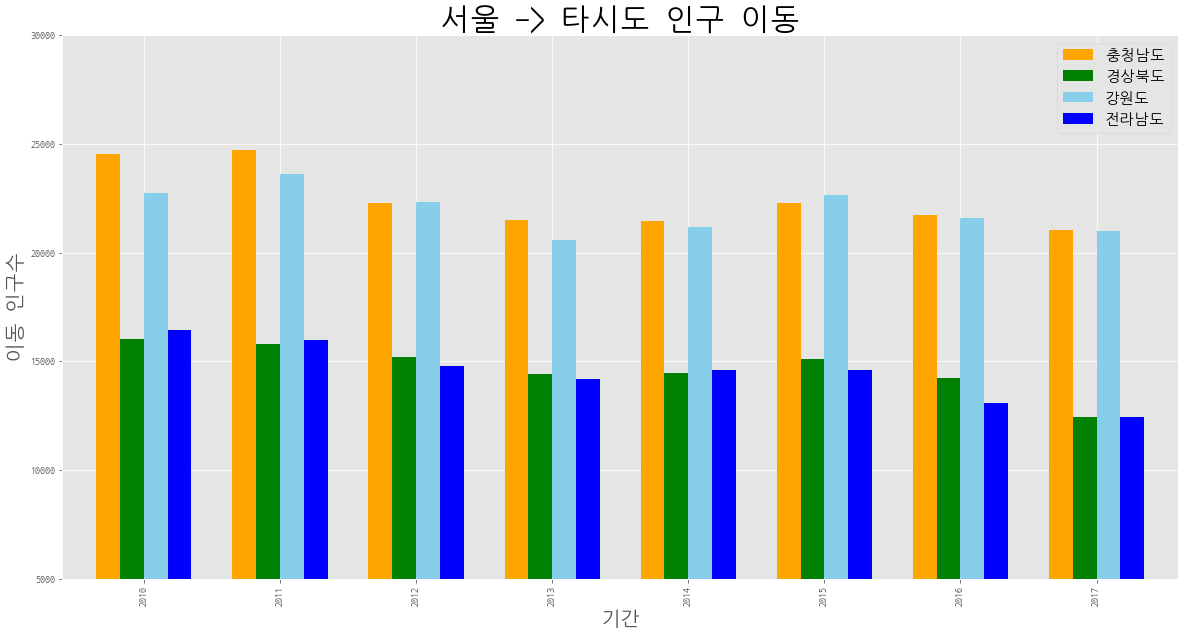

In [8]:
plt.style.use('ggplot')

# 데이터 프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df.index = df.index.map(int)

# 막대 그래프 그리기(막대 너비와 color 지정)
df.plot(kind='bar', figsize=(20, 10), width = 0.7, color=['orange', 'green', 'skyblue', 'blue'])

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.xlabel('기간', size = 20)                  
plt.ylabel('이동 인구수', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

### 가로형 막대그래프
---
각 변수 사이 값의 크기 차이를 설명하는 데 적합

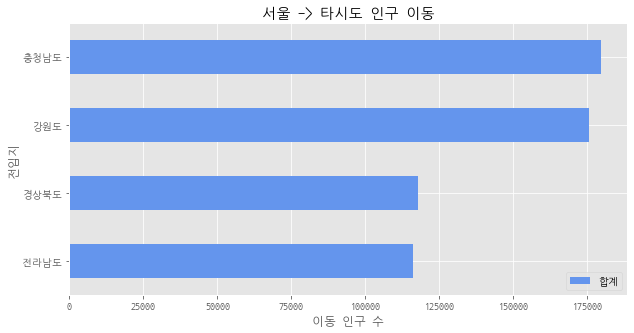

In [10]:
col_years = list(map(str, range(2010, 2018)))
df2 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df2['합계'] = df2.sum(axis = 1)

# 가장 큰 값부터 정렬
df_total = df2[['합계']].sort_values(by='합계', ascending=True)

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title("서울 -> 타시도 인구 이동")
plt.xlabel('이동 인구 수')                  
plt.ylabel('전입지')

plt.show()


### 보조 축 활용하기(2축 그래프 그리기)
---
axe 객체 활용

#### 데이터 불러오기 및 전처리

In [29]:
font_path2 = "C:\\USERS\\USER\\APPDATA\\LOCAL\\MICROSOFT\\WINDOWS\\FONTS\\MALGUN.ttf"
font_name2 = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [48]:
df_SNe = pd.read_excel('E:\\Python\\남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17316\653701061.py:1: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df_SNe = pd.read_excel('E:\\Python\\남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)


In [49]:
## 북한의 연도별 발전량
df_N = df_SNe.iloc[5:9]
df_N.drop('전력량 (억㎾h)', axis=1, inplace=True)
df_N.set_index('발전 전력별', inplace=True)
df_N = df_N.T
df_N.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17316\4063947713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N.drop('전력량 (억㎾h)', axis=1, inplace=True)


발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [51]:
# 북한 발전량의 전년대비 증감률 계산
df_N = df_N.rename(columns = {'합계': "총발전량"})
df_N["총 발전량 - 1"] = df_N["총발전량"].shift(1)
df_N['증감률'] = ((df_N['총발전량']/df_N['총 발전량 - 1']) - 1) * 100
df_N.head()

발전 전력별,총발전량,수력,화력,원자력,총 발전량 - 1,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


#### 2축 그래프 그리기

In [53]:
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 부호 출력 설정

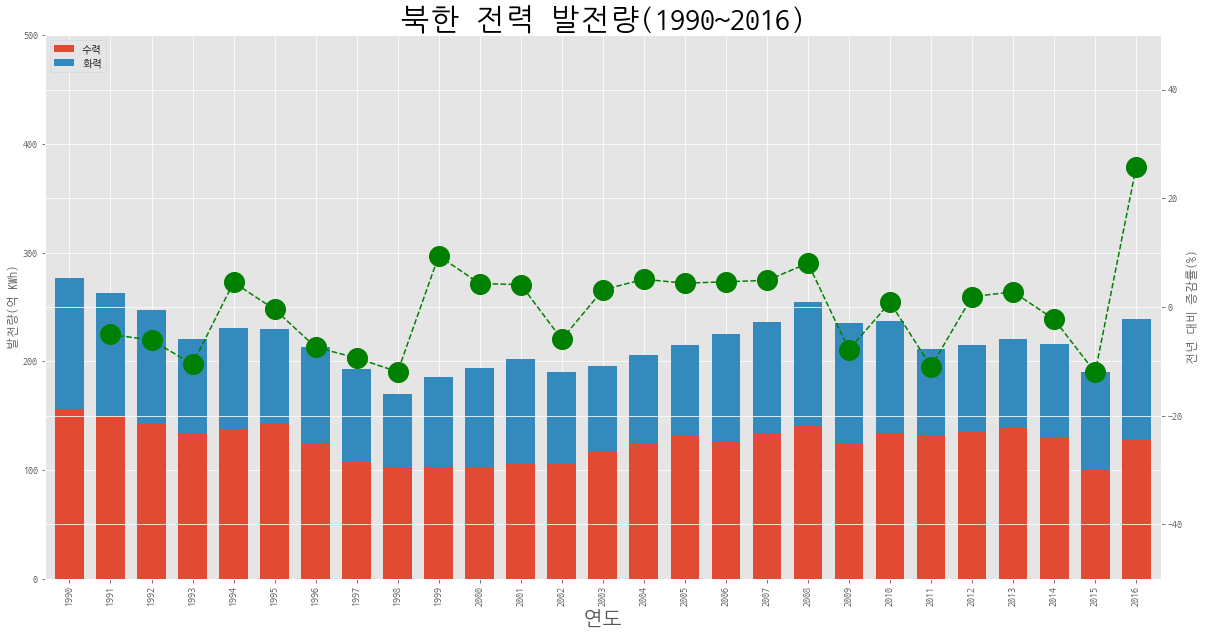

In [56]:
ax1 = df_N[['수력', '화력']].plot(kind = 'bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df_N.index, df_N.증감률, ls='--', marker='o', markersize = 20, color='green', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size = 20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량(1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()